***AdEx: the Adaptive Exponential Integrate-and-Fire model***

The AdEx model extends the exponential LIF model by adding an adaptation current; this allows the model to capture phenomena such as spike-frequency adaptation and bursting. 
Biological neurons often show adaptation; a phenomenon where repeated firing leads to an increased effective threshold or decreased firing rate over time. The AdEx model adds an adaptation variable 𝑤 to account for this; this current increases each time the neuron fires, leading to spike frequency reduction over time. 

An Exponential Integrate-and-Fire model with a single adaptation current w was implemented:

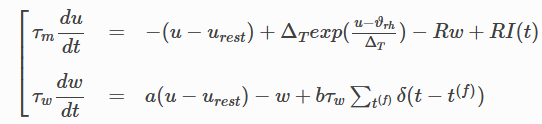

When you simulate this model with the default parameters, it produces a high frequency initial burst pattern (see simulation and firing patterns below).

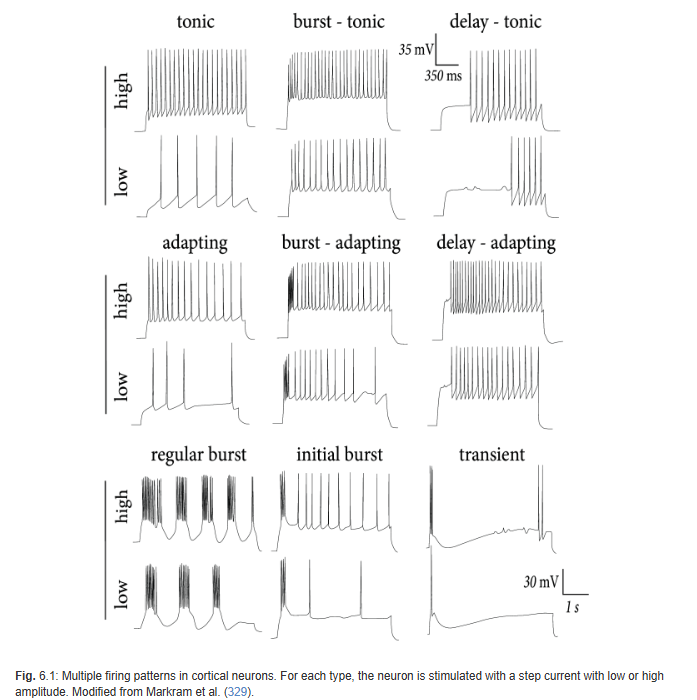

In [2]:
''' I redefine the function plot_adex_state from the tutorial to plot the membrane potential, 
the adaptation current and the phase plane representation of the AdEx neuron, since I didn't like the formatting of the original. I also add a title to each subplot.'''


def plot_adex_state(adex_state_monitor):
    """
    Visualizes the state variables: w-t, v-t and phase-plane w-v

    Args:
    adex_state_monitor (StateMonitor): States of "v" and "w"
    """
    plt.subplot(2, 2, 1)
    plt.plot(adex_state_monitor.t / b2.ms, adex_state_monitor.v[0] / b2.mV, lw=2)
    plt.xlabel("t [ms]")
    plt.ylabel("u [mV]")
    plt.title("Membrane potential")
    plt.subplot(2, 2, 2)
    plt.plot(adex_state_monitor.v[0] / b2.mV, adex_state_monitor.w[0] / b2.pA, lw=2)
    plt.xlabel("u [mV]")
    plt.ylabel("w [pAmp]")
    plt.title("Phase plane representation")
    plt.subplot(2, 2, 3)
    plt.plot(adex_state_monitor.t / b2.ms, adex_state_monitor.w[0] / b2.pA, lw=2)
    plt.xlabel("t [ms]")
    plt.ylabel("w [pAmp]")
    plt.title("Adaptation current")
    plt.tight_layout()
    plt.show()

nr of spikes: 10


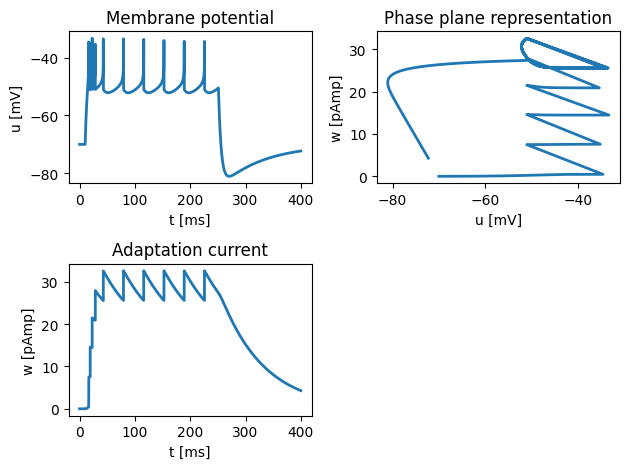

In [3]:
%matplotlib inline
import brian2 as b2
import matplotlib.pyplot as plt
from neurodynex3.adex_model import AdEx
from neurodynex3.tools import plot_tools, input_factory


current = input_factory.get_step_current(10, 250, 1. * b2.ms, 65.0 * b2.pA)
state_monitor, spike_monitor = AdEx.simulate_AdEx_neuron(I_stim=current, simulation_time=400 * b2.ms)
#plot_tools.plot_voltage_and_current_traces(state_monitor, current)
print("nr of spikes: {}".format(spike_monitor.count[0]))

plot_adex_state(state_monitor)


***Call the function AdEx.simulate_AdEx_neuron() with different parameters and try to create adapting, bursting and irregular firing patterns.***

Adapting

nr of spikes: 10


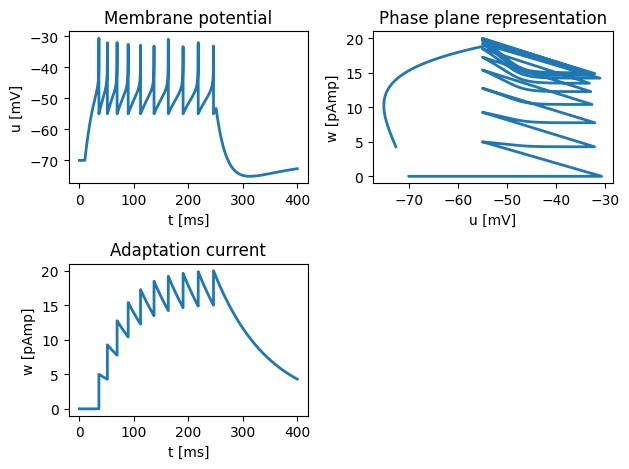

In [4]:
%matplotlib inline
import brian2 as b2
from neurodynex3.adex_model import AdEx
from neurodynex3.tools import plot_tools, input_factory

# adaptive bursting: tau_m = 20, a = 0, tau_w = 100, b = 5, u_r = -55

current = input_factory.get_step_current(10, 250, 1. * b2.ms, 65.0 * b2.pA)
state_monitor, spike_monitor = AdEx.simulate_AdEx_neuron(I_stim=current, 
                                                         simulation_time=400 * b2.ms, 
                                                         tau_m = 20*b2.ms, 
                                                         a = 0*b2.nsiemens, 
                                                         b = 5.*b2.pamp, 
                                                         tau_w = 100 *b2.ms, 
                                                         v_reset = -55 *b2.mvolt)
#plot_tools.plot_voltage_and_current_traces(state_monitor, current)
print("nr of spikes: {}".format(spike_monitor.count[0]))

plot_adex_state(state_monitor)

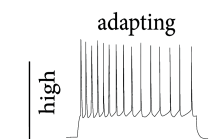

(Initial) Bursting

nr of spikes: 25


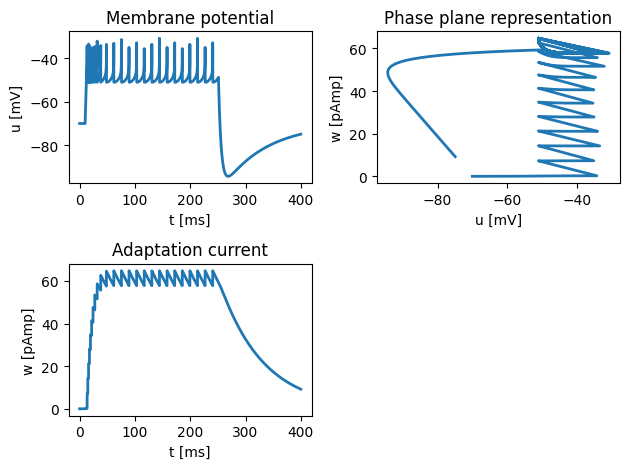

In [30]:
%matplotlib inline
import brian2 as b2
from neurodynex3.adex_model import AdEx
from neurodynex3.tools import plot_tools, input_factory

# initial bursting

current = input_factory.get_step_current(10, 250, 1. * b2.ms, 100 * b2.pA)

state_monitor, spike_monitor = AdEx.simulate_AdEx_neuron(a = 0.5 *b2.nS, 
                                                         I_stim=current, 
                                                         simulation_time=400 * b2.ms)
#plot_tools.plot_voltage_and_current_traces(state_monitor, current)
print("nr of spikes: {}".format(spike_monitor.count[0]))

plot_adex_state(state_monitor)

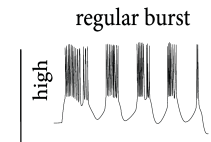

Irregular bursting

*Parameters derived from https://pmc.ncbi.nlm.nih.gov/articles/PMC2798047/*

nr of spikes: 19


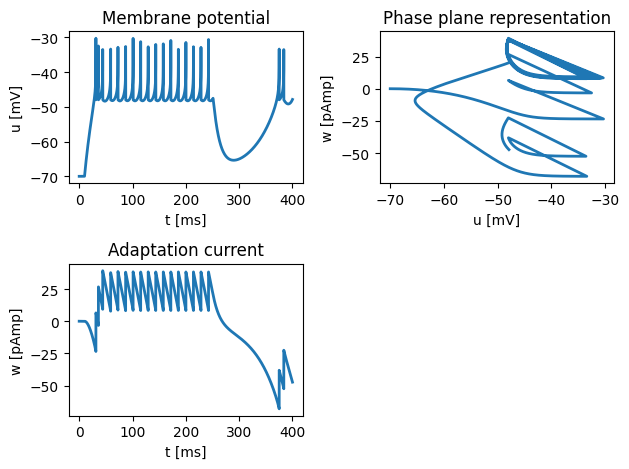

In [6]:
%matplotlib inline
import brian2 as b2
from neurodynex3.adex_model import AdEx
from neurodynex3.tools import plot_tools, input_factory

# irregular bursting: tau_m = 9.9, a = -0.5, tau_w = 100, b = 7, u_r = -46

current = input_factory.get_step_current(10, 250, 1. * b2.ms, 65.0 * b2.pA)
state_monitor, spike_monitor = AdEx.simulate_AdEx_neuron(I_stim=current, 
                                                         simulation_time=400 * b2.ms,
                                                         delta_T = 2 *b2.mV, 
                                                         tau_m = 20*b2.ms, 
                                                         a = -11*b2.nsiemens, 
                                                         b = 30.*b2.pamp, 
                                                         tau_w = 130 *b2.ms, 
                                                         v_reset = -48 *b2.mvolt)

#plot_tools.plot_voltage_and_current_traces(state_monitor, current)
print("nr of spikes: {}".format(spike_monitor.count[0]))

plot_adex_state(state_monitor)

***Phase plane and nullclines***

*Plot or sketch u and w nullclines of AdEx model I(t) = 0*

nr of spikes: 0


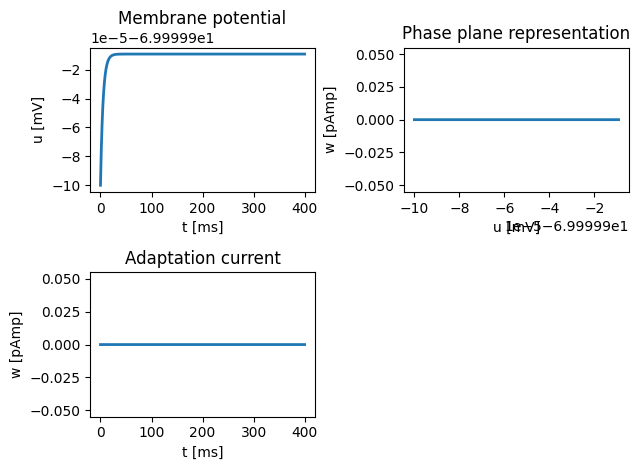

In [7]:
%matplotlib inline
import brian2 as b2
from neurodynex3.adex_model import AdEx
from neurodynex3.tools import plot_tools, input_factory

current = input_factory.get_step_current(10, 250, 1. * b2.ms, 0 * b2.pA)
state_monitor, spike_monitor = AdEx.simulate_AdEx_neuron(a = 0 *b2.nS, tau_w = 10*b2.ms, I_stim=current, simulation_time=400 * b2.ms)
#plot_tools.plot_voltage_and_current_traces(state_monitor, current)
print("nr of spikes: {}".format(spike_monitor.count[0]))

plot_adex_state(state_monitor)

***Questions:***

1. How do the nullclines change with respect to a?
2. How do the nullclines change if a constant current I(t) = c is applied?
3. What is the interpretation of parameter b?
4. How do flow arrows change as tau_w gets bigger?

In order to investigate this, I made the following simulations: 

*How do the nullclines change with respect to a?*

nr of spikes: 13


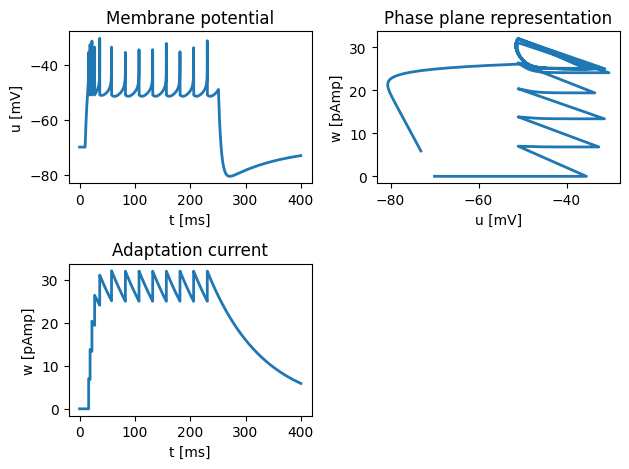

In [8]:
%matplotlib inline
import brian2 as b2
from neurodynex3.adex_model import AdEx
from neurodynex3.tools import plot_tools, input_factory

# a = 0

current = input_factory.get_step_current(10, 250, 1. * b2.ms, 65.5 * b2.pA)

state_monitor, spike_monitor = AdEx.simulate_AdEx_neuron(a = 0 *b2.nS,
                                                         I_stim=current, 
                                                         simulation_time=400 * b2.ms)
#plot_tools.plot_voltage_and_current_traces(state_monitor, current)
print("nr of spikes: {}".format(spike_monitor.count[0]))

plot_adex_state(state_monitor)

nr of spikes: 10


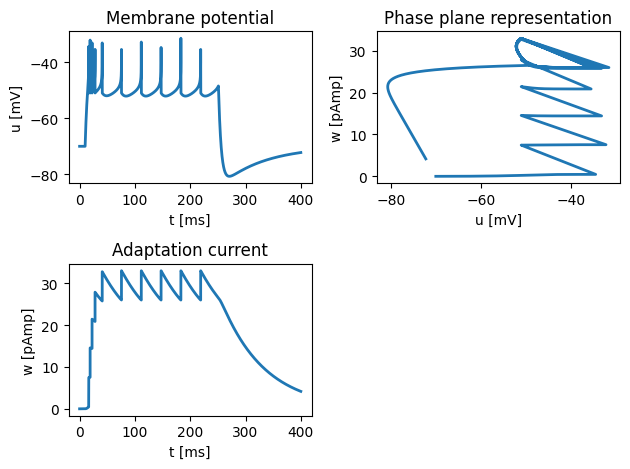

In [9]:
%matplotlib inline
import brian2 as b2
from neurodynex3.adex_model import AdEx
from neurodynex3.tools import plot_tools, input_factory

# a = 0.5

current = input_factory.get_step_current(10, 250, 1. * b2.ms, 65.5 * b2.pA)

state_monitor, spike_monitor = AdEx.simulate_AdEx_neuron(a = 0.5 *b2.nS, 
                                                         I_stim=current, 
                                                         simulation_time=400 * b2.ms)
#plot_tools.plot_voltage_and_current_traces(state_monitor, current)
print("nr of spikes: {}".format(spike_monitor.count[0]))

plot_adex_state(state_monitor)

nr of spikes: 16


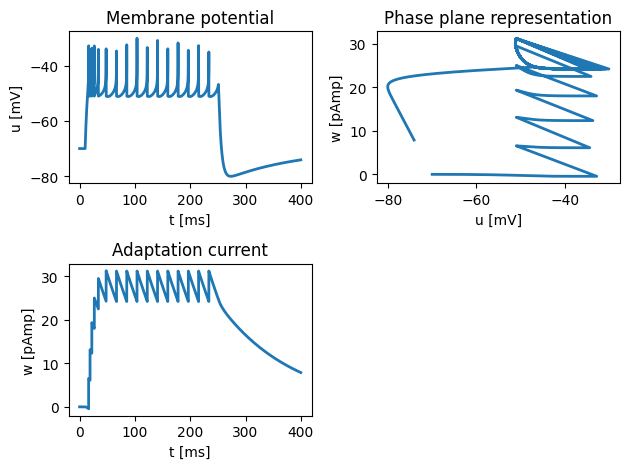

In [10]:
%matplotlib inline
import brian2 as b2
from neurodynex3.adex_model import AdEx
from neurodynex3.tools import plot_tools, input_factory

# a = -0.5

current = input_factory.get_step_current(10, 250, 1. * b2.ms, 65.5 * b2.pA)

state_monitor, spike_monitor = AdEx.simulate_AdEx_neuron(a = -0.5 *b2.nS, 
                                                         I_stim=current, 
                                                         simulation_time=400 * b2.ms)
#plot_tools.plot_voltage_and_current_traces(state_monitor, current)
print("nr of spikes: {}".format(spike_monitor.count[0]))

plot_adex_state(state_monitor)

nr of spikes: 8


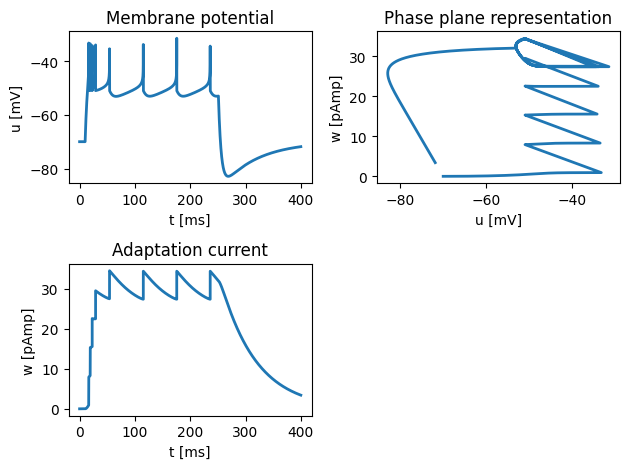

In [11]:
%matplotlib inline
import brian2 as b2
from neurodynex3.adex_model import AdEx
from neurodynex3.tools import plot_tools, input_factory

# a = 1

current = input_factory.get_step_current(10, 250, 1. * b2.ms, 65.5 * b2.pA)

state_monitor, spike_monitor = AdEx.simulate_AdEx_neuron(a = 1 *b2.nS, 
                                                         I_stim=current, 
                                                         simulation_time=400 * b2.ms)
#plot_tools.plot_voltage_and_current_traces(state_monitor, current)
print("nr of spikes: {}".format(spike_monitor.count[0]))

plot_adex_state(state_monitor)

For a clearer comparison, here they are side by side: 

a = 0 

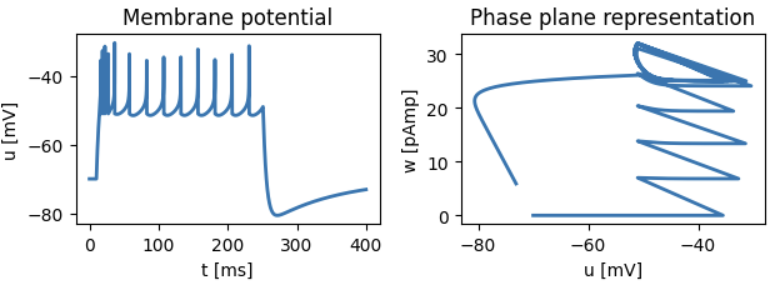

a = 0.5

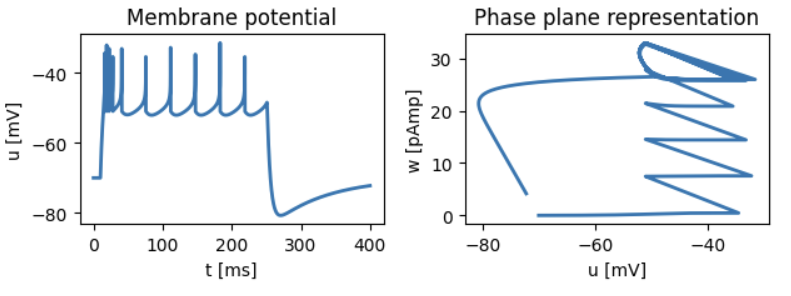

a = -0.5

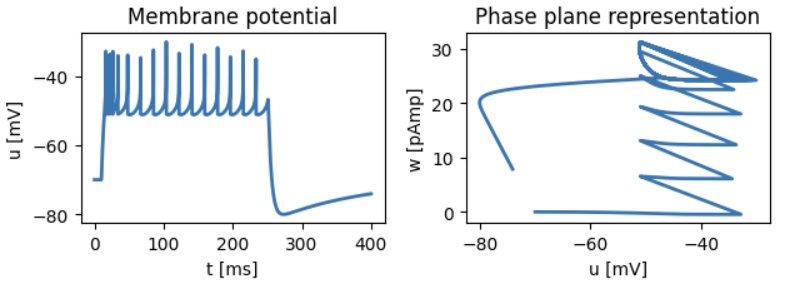

a = 1

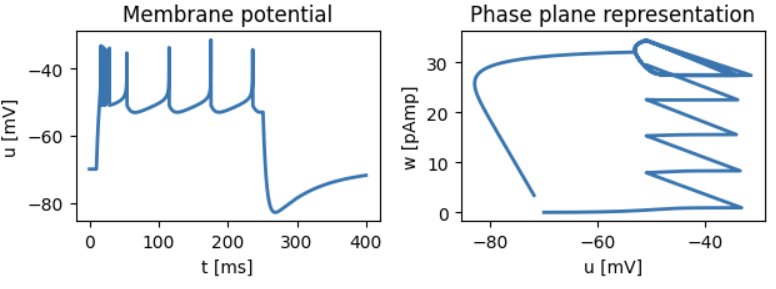


w represents the adaptation current opposing the membrane potential. It's dynamics are determines by tau_w; the timescale of the adaptation evolution, a; how strongly the adaptation is coupled to the membrane potential and b; determining the jump of the spike-triggered adaptation.

In the phase-plane representation, the w-nullcline (which determines where adaptation remains constant) becomes steeper as *a* increases. So, a higher *a* means even moderate depolarizations will significantly increase w. We see that for *a* = 0, w's incline is horizontal, since coupling between the voltage and w is minimal for *a* = 0. As a result, adaptation will only increase slowly over time. As expected, the *a* = 0.5 and *a* = 1 plots exhibit a faster growth of the adaptation variable w due to the increased slope and thus the model shows more and faster adaptation over time. The slowest adaptation is observed in *a* = - 0.5, as we would expect. The negative value for a causes negative feedback adaptation, meaning that w decreases as the voltage increases. However, we still some adaptation over time. This is caused by the parameter b; after each spike w jumps by an amount b, representing how much adaptation kicks in after each spike. Larger b values lead to stronger spike-frequency adaptation or bursting. The parameter b can be finetuned to create different spiking patterns. For example: 


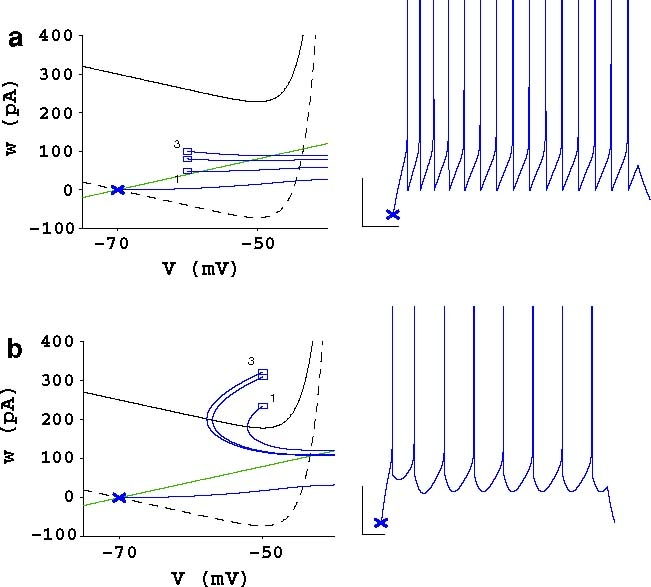

*Figure adapted from Naud, R., Marcille, N., Clopath, C., & Gerstner, W. (2008). Firing patterns in the adaptive exponential integrate-and-fire model. Biological Cybernetics, 99(4-5), 335-347. https://doi.org/10.1007/s00422-008-0264-7*

Where figure A shows the resulting spiking pattern for a small b and figure B for a large b. 



*How do the nullclines change if a constant current I(t) = c is applied?*

nr of spikes: 0


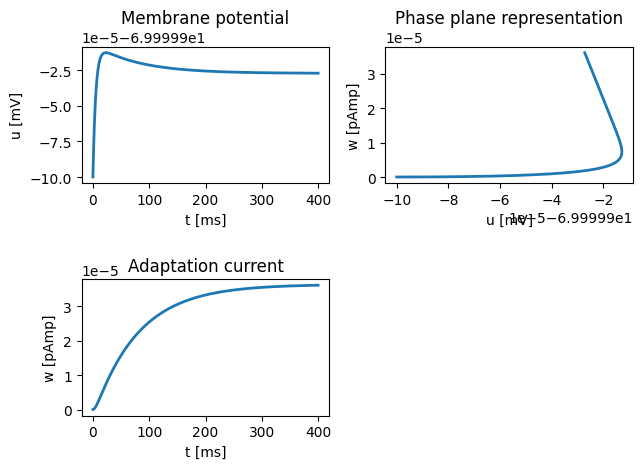

In [12]:
%matplotlib inline
import brian2 as b2
from neurodynex3.adex_model import AdEx
from neurodynex3.tools import plot_tools, input_factory

# I = 0

current = input_factory.get_step_current(10, 250, 1. * b2.ms, 0 * b2.pA)

state_monitor, spike_monitor = AdEx.simulate_AdEx_neuron(a = 0.5 *b2.nS, 
                                                         I_stim=current, 
                                                         simulation_time=400 * b2.ms)
#plot_tools.plot_voltage_and_current_traces(state_monitor, current)
print("nr of spikes: {}".format(spike_monitor.count[0]))

plot_adex_state(state_monitor)

nr of spikes: 25


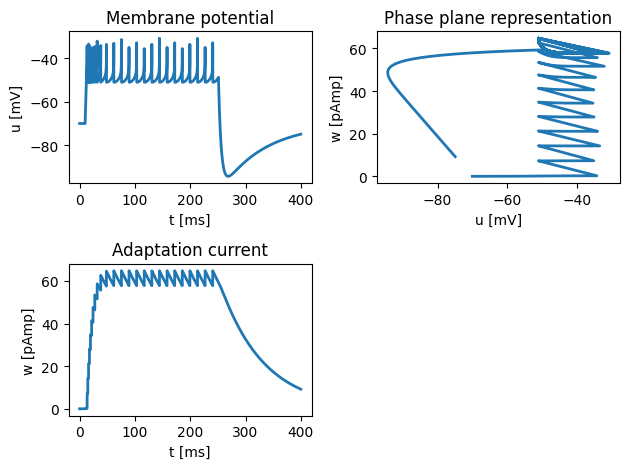

In [29]:
%matplotlib inline
import brian2 as b2
from neurodynex3.adex_model import AdEx
from neurodynex3.tools import plot_tools, input_factory

# I = 100

current = input_factory.get_step_current(10, 250, 1. * b2.ms, 100 * b2.pA)

state_monitor, spike_monitor = AdEx.simulate_AdEx_neuron(a = 0.5 *b2.nS, 
                                                         I_stim=current, 
                                                         simulation_time=400 * b2.ms)
#plot_tools.plot_voltage_and_current_traces(state_monitor, current)
print("nr of spikes: {}".format(spike_monitor.count[0]))

plot_adex_state(state_monitor)

*see figure below*

Before injecting any current into the system, the w and V nullclines (green and black dashed line, respectively) form a stable fixed point (blue cross), leaving the system in a resting state. Once a current is injected, the V nullcline shifts upwards (solid black line). This causes the system to enter a state of repetitive firing. 

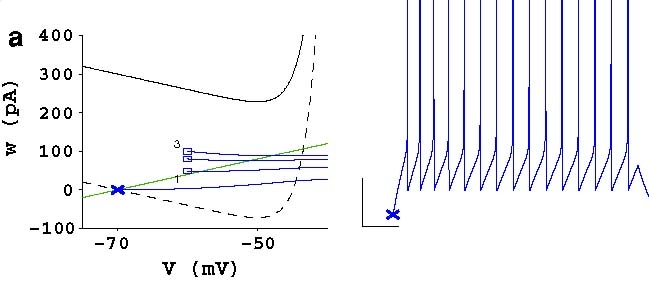

*Figure adapted from 
Naud, R., Marcille, N., Clopath, C., & Gerstner, W. (2008). Firing patterns in the adaptive exponential integrate-and-fire model. Biological Cybernetics, 99(4-5), 335-347. https://doi.org/10.1007/s00422-008-0264-7*



*How do flow arrows change as tau_w gets bigger?*

tau_w controls how quickly the adaptation current w will decay after spiking. When increasing the time constant tau_w, the adaptation variable w will evolve more slowly. This results in a vertical shrinkage of the arrows' magnitude; the flow of the arrows will lean more horizontally: 

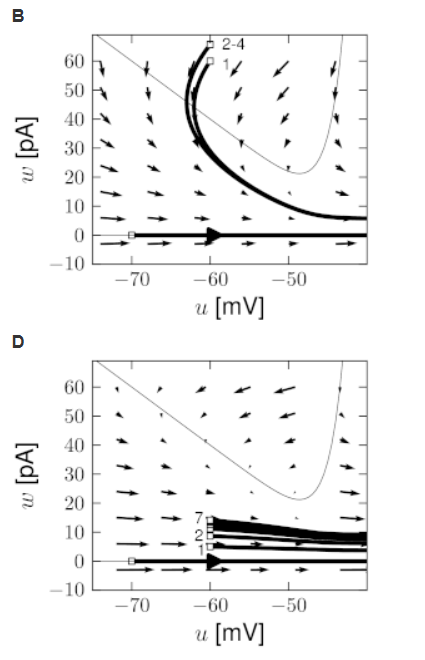

B: tau_w = 30 ms
D: tau_w = 100 ms

As a result the system will slowly recover from a spike and will stay in a suppressed state for longer. This will cause a lower spiking frequency. To illustrate: 

nr of spikes: 26


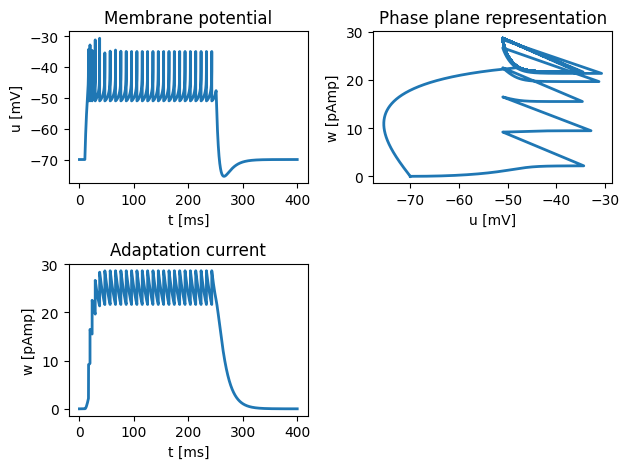

In [31]:
%matplotlib inline
import brian2 as b2
import matplotlib.pyplot as plt
from neurodynex3.adex_model import AdEx
from neurodynex3.tools import plot_tools, input_factory

#tau_w = 20

current = input_factory.get_step_current(10, 250, 1. * b2.ms, 65.0 * b2.pA)
state_monitor, spike_monitor = AdEx.simulate_AdEx_neuron(I_stim=current, simulation_time=400 * b2.ms, tau_w=20*b2.ms)
#plot_tools.plot_voltage_and_current_traces(state_monitor, current)
print("nr of spikes: {}".format(spike_monitor.count[0]))

plot_adex_state(state_monitor)


nr of spikes: 15


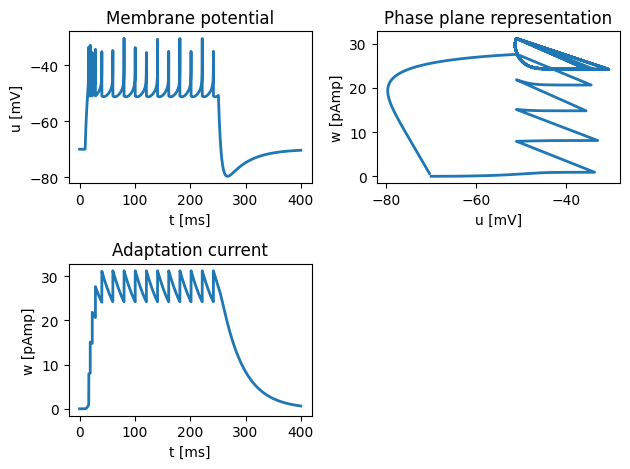

In [32]:
%matplotlib inline
import brian2 as b2
import matplotlib.pyplot as plt
from neurodynex3.adex_model import AdEx
from neurodynex3.tools import plot_tools, input_factory

#tau_w = 50

current = input_factory.get_step_current(10, 250, 1. * b2.ms, 65.0 * b2.pA)
state_monitor, spike_monitor = AdEx.simulate_AdEx_neuron(I_stim=current, simulation_time=400 * b2.ms, tau_w=50*b2.ms)
#plot_tools.plot_voltage_and_current_traces(state_monitor, current)
print("nr of spikes: {}".format(spike_monitor.count[0]))

plot_adex_state(state_monitor)


nr of spikes: 10


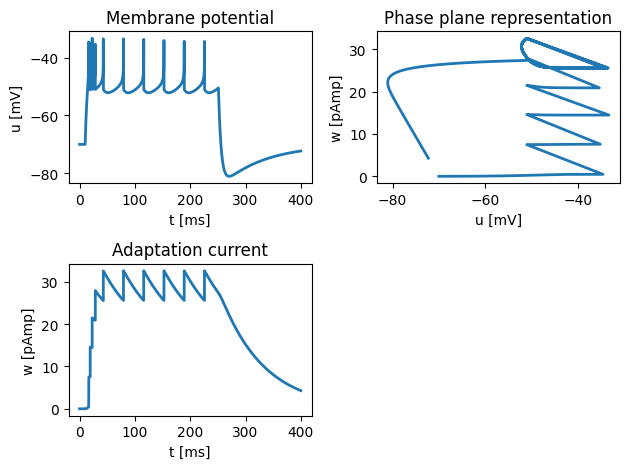

In [33]:
%matplotlib inline
import brian2 as b2
import matplotlib.pyplot as plt
from neurodynex3.adex_model import AdEx
from neurodynex3.tools import plot_tools, input_factory

#tau_w = 100

current = input_factory.get_step_current(10, 250, 1. * b2.ms, 65.0 * b2.pA)
state_monitor, spike_monitor = AdEx.simulate_AdEx_neuron(I_stim=current, simulation_time=400 * b2.ms, tau_w=100*b2.ms)
#plot_tools.plot_voltage_and_current_traces(state_monitor, current)
print("nr of spikes: {}".format(spike_monitor.count[0]))

plot_adex_state(state_monitor)


***Can you predict what would be the firing pattern if a is small?***

To do so, consider the following 2 conditions:

1. A small jump b and small time scale tau_w


nr of spikes: 38


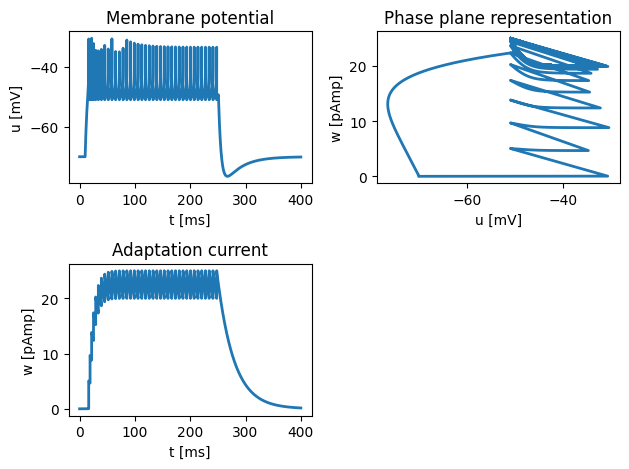

In [17]:
%matplotlib inline
import brian2 as b2
from neurodynex3.adex_model import AdEx
from neurodynex3.tools import plot_tools, input_factory

current = input_factory.get_step_current(10, 250, 1. * b2.ms, 65.0 * b2.pA)
state_monitor, spike_monitor = AdEx.simulate_AdEx_neuron(a = 0.01 *b2.nS, b = 5 *b2.pA, tau_w = 30 *b2.ms, I_stim=current, simulation_time=400 * b2.ms)
#plot_tools.plot_voltage_and_current_traces(state_monitor, current)
print("nr of spikes: {}".format(spike_monitor.count[0]))
plot_adex_state(state_monitor)

small a: subthreshold adaptation is weak

small b: spike-frequency adaptation is minimal, w minimally increments

small tau_w: adaptation current decays quickly. 

We can use the phase-plane representation to analyse the effects of small parameters. As the membrane depolarizes, w only slightly increases due to the minimal subthreshold adaptation (small a). Once the spiking threshold is reached, multiple loops (or; spikes) form. However, each increment in w is small (small b). Due to the fast decay of the adaptation (small tau_w), we see that w drops back quickly towards lower values after a spike, preventing it to build up to high sustained levels. As a result of these parameters, we do not see a lot of adaptation when observing the membrane potential. 

2. A large jump b and a large time scale tau_w

nr of spikes: 8


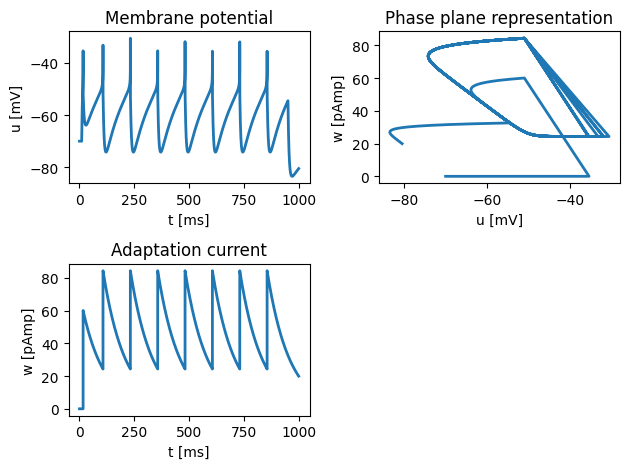

In [34]:
%matplotlib inline
import brian2 as b2
from neurodynex3.adex_model import AdEx
from neurodynex3.tools import plot_tools, input_factory

# due to the high tau_w, I will increase the simulation time to 1000 ms

current = input_factory.get_step_current(10, 950, 1. * b2.ms, 65.0 * b2.pA)
state_monitor, spike_monitor = AdEx.simulate_AdEx_neuron(a = 0.01 *b2.nS, b = 60 *b2.pA, tau_w = 100 *b2.ms, I_stim=current, simulation_time=1000 * b2.ms)
#plot_tools.plot_voltage_and_current_traces(state_monitor, current)
print("nr of spikes: {}".format(spike_monitor.count[0]))
plot_adex_state(state_monitor)

As before, we see a small adaptation-voltage coupling; as the membrane potential increases w barely increases with it. However, due to the large b we see that once the spiking threshold is reached, w is incremented by a large amount. After a spike, the increased w results in a stronger after-hyperpolarization, pushing the membrane potential lower and taking longer to recover back to threshold. Overall, we observe strong spike‐triggered adaptation that persists for a long time, as seen in the membrane potential. We obtain widely spaced spikes because each spike produces a large and long-lived adaptive current which keeps the neuron hyperpolarized. A larger tau_w decays more slowly, prolonging the effects of adaptation and increasing spike intervals. Over successive spikes, w builds up, making it harder for the neuron to fire at the same frequency.

All in all, in both cases a small value for a seems to result in a tonic firing pattern. Since adaptation does not strongly build up before a spike, the neuron behaves similarly to a standard Integrate-and-Fire neuron. The neuron spikes regularly as long as there is sufficient input current and little to no spike-frequency adaptation occurs.

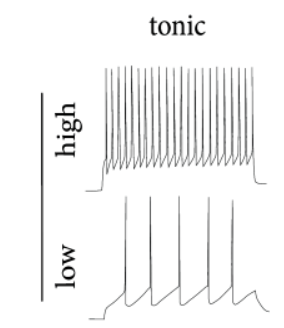